In [1]:
#pip install librosa

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#Creamos conjuntos vacíos para categorizar todo los valores entrantes y la ruta de acceso a los datos de 'kick' y 'snare'
all_labels = []

In [5]:
audio_folderkick = '/Users/rodolfolobocarrasco/Desktop/Audio_Machine_Learning/projects/project_1/solution/data/kick'
audio_fileskick = [os.path.join(audio_folderkick, file) for file in os.listdir(audio_folderkick) if file.endswith('.wav')]

In [6]:
all_featureskick = []

¿Por qué no usó wav2vec2 y t-sne?

In [7]:

# Bucle para todas las características de 'kick'
for file_path in audio_fileskick:
  # Cargar el archivo de audio, se utiliza el sample rate original de los audios
  audio, sample_rate = librosa.load(file_path)

  # Extraer características
  chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate, tuning=None)
  spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
  zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
  spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
  spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)

 # Encuentra el mínimo número de filas (tiempo) entre todas las características extraídas
 # Ya que diferentes características pueden tener diferentes longitudes temporales debido a como se calculan.

  min_length = min(chroma.shape[1], spectral_contrast.shape[1], zero_crossing_rate.shape[1], spectral_rolloff.shape[1], spectral_bandwidth.shape[1], spectral_centroid.shape[1])

 # Trunca las características para que todas tengan el mismo número de filas
 # Esto garantiza que todas las características tengan la misma longitud temporal para que puedan ser apiladas y comparadas de manera efectiva.
  chroma = chroma[:, :min_length]
  spectral_contrast = spectral_contrast[:, :min_length]
  zero_crossing_rate = zero_crossing_rate[0, :min_length]
  spectral_rolloff = spectral_rolloff[0, :min_length]
  spectral_bandwidth = spectral_bandwidth[0, :min_length]
  spectral_centroid = spectral_centroid[0, :min_length]

 # Apila las características horizontalmente para el archivo actual
 # Lo que significa que para cada punto de tiempo, tienes un vector que es la concatenación de todas las características en ese punto de tiempo
 # El método '.T' es usado para transponer las matrices de características para que concuerden con la estructura de datos esperada por los algoritmos de aprendizaje automático.
  features = np.hstack((chroma.T, spectral_contrast.T, zero_crossing_rate.reshape(-1, 1), spectral_rolloff.reshape(-1, 1), spectral_bandwidth.reshape(-1, 1), spectral_centroid.reshape(-1, 1)))

 # Añade la matriz de características a la lista general
  all_featureskick.append(features)
  all_labels.append('kick')

# Después del bucle, cuando todas las características hayan sido calculadas y ajustadas
# Concatena todas las matrices de características a lo largo del eje 0 (apilamiento vertical)
final_feature_matrixkick = np.vstack(all_featureskick)


/Users/rodolfolobocarrasco/.pyenv/versions/3.11.6/envs/ambiente-audio-2023/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [8]:
audio_foldersnare = '/Users/rodolfolobocarrasco/Desktop/Audio_Machine_Learning/projects/project_1/solution/data/snare'
audio_filessnare = [os.path.join(audio_foldersnare, file) for file in os.listdir(audio_foldersnare) if file.endswith('.wav')]

In [9]:
all_featuressnare = []

In [10]:
# Mismo proceso pero ahora para 'snare'

# Bucle para todas las características de 'snare'
for file_path in audio_filessnare:
  # Cargar el archivo de audio
  audio, sample_rate = librosa.load(file_path)

  # Extraer características
  chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate, tuning=None)
  spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
  zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
  spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
  spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)

  min_length = min(chroma.shape[1], spectral_contrast.shape[1], zero_crossing_rate.shape[1], spectral_rolloff.shape[1], spectral_bandwidth.shape[1], spectral_centroid.shape[1])

  chroma = chroma[:, :min_length]
  spectral_contrast = spectral_contrast[:, :min_length]
  zero_crossing_rate = zero_crossing_rate[0, :min_length]
  spectral_rolloff = spectral_rolloff[0, :min_length]
  spectral_bandwidth = spectral_bandwidth[0, :min_length]
  spectral_centroid = spectral_centroid[0, :min_length]

  features = np.hstack((chroma.T, spectral_contrast.T, zero_crossing_rate.reshape(-1, 1), spectral_rolloff.reshape(-1, 1), spectral_bandwidth.reshape(-1, 1), spectral_centroid.reshape(-1, 1)))

  all_featuressnare.append(features)
  all_labels.append('snare')

final_feature_matrixsnare = np.vstack(all_featuressnare)


In [11]:
# Concatenar las matrices de características de 'kick' y 'snare' en una sola matriz.
# Como resultado, se obtiene una matriz donde cada fila representa un conjunto de características de uno de los sonidos.
final_feature_matrix = np.concatenate((final_feature_matrixkick, final_feature_matrixsnare))
print(final_feature_matrix.shape)

(6960, 23)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Convertir etiquetas categóricas a numéricas, se asignará un valor numérico a cada una de las categorías únicas de etiquetas.
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(all_labels)  # 'kick' y 'snare' se convierten a 0 y 1, respectivamente

In [13]:
print(labels.shape)

(80,)


In [14]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler, y se inicia la normalización
scaler = StandardScaler()

# Ajustar y transformar la matriz de características
X_scaled = scaler.fit_transform(final_feature_matrix)

# Ahora final_feature_matrix está normalizado y listo para la reducción de dimensionalidad


In [15]:
from sklearn.manifold import TSNE

# Configura t-SNE con los parámetros deseados lo que significa que se reducirá la dimensionalidad de las características a dos dimensiones
tsne = TSNE(n_components=2, random_state=42)

# Aplica t-SNE a las características normalizadas para reducir su dimensionalidad
# Como resultado, 'transformed_data' es una representación bidimensional de las características de audio.
transformed_data = tsne.fit_transform(X_scaled)

In [16]:
transformed_data.shape

(6960, 2)

In [17]:
import pandas as pd

In [18]:
# Crear DataFrame que permite manejar los datos de manera más conveniente para análisis y visualización.
df_tsne = pd.DataFrame(transformed_data)

# Agregar una columna de 'targets' al DataFrame que contendrá las etiquetas de los datos.
# Se asigna 1 a todas las filas que representan 'kick' y 0 a todas las filas que representan 'snare'.
# Esto se logra multiplicando una lista de unos o ceros por el número de veces que cada etiqueta
# aparece en el conjunto de datos, que es igual al número de filas de las características de 'kick'
# y 'snare', respectivamente.
df_tsne['targets'] = final_feature_matrixkick.shape[0]*[1] + final_feature_matrixsnare.shape[0]*[0]

In [19]:
# Asignar nombres a las columnas del DataFrame para una referencia más entendible.
# Las dos primeras columnas contienen las coordenadas x e y de la visualización t-SNE,
# y la tercera columna contiene las etiquetas o 'targets'.
df_tsne.columns = ['x','y','targets']

In [20]:
# Muestra las primeras 5 filas del DataFrame
df_tsne.head(5)

,x,y,targets
0,24.756870,15.668330,1
1,34.338223,3.526079,1
2,34.210819,-5.917935,1
3,45.420788,-4.974782,1
4,57.374584,-1.252133,1


In [21]:
import seaborn as sns

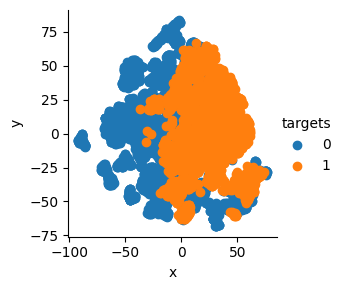

In [22]:
# Crear un 'FacetGrid' que es una figura con varios ejes donde se pueden dibujar gráficos.
grid = sns.FacetGrid(df_tsne,hue = "targets")

# Se especifican las columnas 'x' e 'y' como las coordenadas para el gráfico de dispersión.
grid.map(plt.scatter,"x","y").add_legend()

In [23]:
# Seleccionar las columnas 'x' e 'y' del DataFrame para usar como características (X).
X = df_tsne[['x','y']]
# Seleccionar la columna 'targets' del DataFrame para usar como etiquetas (y).
y = df_tsne['targets']
# Convertir los DataFrames de pandas a arrays de NumPy.
X = X.to_numpy()
y = y.to_numpy()

In [24]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba.
# 'test_size=0.2' significa que el 20% de los datos se utilizará para el conjunto de prueba, y el resto para el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica las divisiones
print("Entrenamiento de características (X_train):", len(X_train))
print("Entrenamiento de etiquetas (y_train):", len(y_train))
print("Prueba de características (X_test):", len(X_test))
print("Prueba de etiquetas (y_test):", len(y_test))

# Los pares X_train y y_train deben tener la misma longitud, y lo mismo para X_test y y_test.


Entrenamiento de características (X_train): 5568
Entrenamiento de etiquetas (y_train): 5568
Prueba de características (X_test): 1392
Prueba de etiquetas (y_test): 1392


In [25]:
# StandardScaler normaliza los datos de tal manera que tengan una media de 0 y una desviación estándar de 1.
scaler = StandardScaler()

# Ajustar el scaler al conjunto de entrenamiento y transformarlo.
X_train_scaled = scaler.fit_transform(X_train)
# Transformar el conjunto de prueba utilizando los mismos parámetros que se calcularon para el conjunto de entrenamiento.
X_test_scaled = scaler.transform(X_test)


In [26]:
class Perceptron:
    """ 
        doc
    """
    def __init__(self, num_features):
    # Este método inicializa el perceptrón. Se establece un array de pesos (self.weights) y un sesgo (self.bias).
    # Los pesos se inicializan con valores aleatorios pequeños multiplicados por 0.01 para mantenerlos en una escala manejable.

        self.weights = np.random.randn(num_features) * 0.01 ### ¿Por qué no desde una distribución normal? o ceros?
        self.bias = 0

    def forward(self, x):
        """ 
            doc
        """
    # Luego esta sección realiza la propagación hacia adelante.
    # Calcula la salida del perceptrón para una entrada x.
    # Utiliza la función sigmoide para la activación

        z = np.dot(x, self.weights) + self.bias
        return 1 / (1 + np.exp(-z))  # Función sigmoide ######################## ¿por que?

    def backward(self, x, y, y_pred, learning_rate, lambda_param):
        """ 
            doc
        """
    # En la retroprogación actualiza los pesos y el sesgo del perceptrón utilizando el algoritmo de descenso de gradiente.
    # Se aplica una penalización L2 a los pesos para evitar el sobreajuste (esto es lo que hace lambda_param * self.weights).

        error = y - y_pred
        weight_update = learning_rate * (error * x - lambda_param * self.weights)
        bias_update = learning_rate * error

        self.weights += weight_update
        self.bias += bias_update

    def train(self, X, Y, epochs, learning_rate, lambda_param):
        """ 
            doc
        """
    # Se entrena el perceptrón durante un número específico de épocas.
    # En cada época, se actualizan los pesos y el sesgo para cada muestra en el conjunto de entrenamiento.

        for epoch in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.forward(x)
                self.backward(x, y, y_pred, learning_rate, lambda_param)

    def evaluate(self, X, Y):
        """ 
            doc
        """
    # Y finalmente se evalúa el perceptrón en un conjunto de datos.
    # Calcula la precisión del modelo comparando las predicciones con las etiquetas reales.

        correct_predictions = 0
        for x, y in zip(X, Y):
            y_pred = self.forward(x)
            if y_pred >= 0.5 and y == 1 or y_pred < 0.5 and y == 0:
                correct_predictions += 1
        accuracy = correct_predictions / len(Y)
        return accuracy


# Inicializa el Perceptrón con el número de características de tus datos transformados
perceptron = Perceptron(num_features=2)  # Se crea una instancia del perceptrón con 2 características
                                         # Que corresponde al número de dimensiones resultantes de la reducción de dimensionalidad t-SNE.

# Entrena el modelo con los datos de entrenamiento
# Utilizando una tasa de aprendizaje de 0.01 y un parámetro de regularización L2 (lambda_param) de 0.001 durante 10 épocas.
perceptron.train(X_train, y_train, epochs=10, learning_rate=0.01, lambda_param=0.001)

# Evalúa el modelo con los datos de prueba para obtener la precisión
accuracy = perceptron.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100}%")


Accuracy: 56.60919540229885%


In [27]:
#Contrastaremos la perfomance del Perceptron respecto a una Red Neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Definir la arquitectura de la red neuronal
# Este es un modelo lineal de Keras que se compone de una pila de capas
# Se llama así porque permite crear modelos capa por capa en secuencia
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),              # Capa oculta completamente conectada con 64 neuronas y función de activación ReLU
    Dense(32, activation='relu'),                                # Otra capa oculta completamente conectada con 32 neuronas
    Dense(1, activation='sigmoid')                               # Capa de salida con una neurona y activación sigmoidal
])

# Compilar el modelo (Prepara el modelo para el entrenamiento)
model.compile(optimizer=Adam(learning_rate=0.001),  # Optimizador Adam. Optimizador popular que ajusta los pesos de la red durante el entrenamiento
              loss='binary_crossentropy',           # Función de pérdida para clasificación binaria
              metrics=['accuracy'])                 # Se utiliza la 'accuracy' como métrica para monitorizar el rendimiento del modelo durante el entrenamiento

# Proporciona un resumen de la arquitectura del modelo
# mostrando cada capa, su tipo, la forma de salida y el número de parámetros
model.summary()

# Entrenar el modelo con los datos proporcionados
# el modelo se entrena con el conjunto de entrenamiento (X_train, y_train) durante 100 épocas
# validation_split significa los datos de entrenamiento se utilizará para validar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
140/140 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8267 - val_loss: 0.3800 - val_accuracy: 0.8375
Epoch 2/100
140/140 [==============================] - 0s 563us/step - loss: 0.3158 - accuracy: 0.8579 - val_loss: 0.3587 - val_accuracy: 0.8366


In [28]:
# Conclusiones y evaluaciones
#
# Luego de realizar 2 modelos distintos para el mismo conjunto de datos, se puede extraer la siguiente información.
#
# Accuracy Perceptron: 73.5632183908046%, Accuracy Red Neuronal: 93.03%
#
# Respecto al rendimiento La red neuronal supera significativamente al perceptrón.
# Resultado esperado, ya que las redes neuronales son capaces de capturar relaciones no lineales y patrones más complejos en los datos,
# mientras que un perceptrón simple solo puede modelar decisiones lineales.
# Al ser limitada por esa linealidad, si los datos no son linealmente separables, el perceptrón nunca alcanzará una precisión del 100%.
#
# La notable diferencia en el rendimiento indica que el problema de clasificación puede ser demasiado complejo para ser manejado eficazmente por un modelo tan simple como el perceptrón.
# Los sonidos de 'kick' y 'snare' pueden tener diferencias sutiles y características no lineales que solo un modelo más complejo puede capturar.
#
# Un modelo con un 94.18% de precisión es bastante firme, especialmente si consideramos que la clasificación de audio es una tarea compleja sujeta a muchas variaciones.
# Por lo que la red neuronal muestra una mejor capacidad de generalización,
# a pesar de ser más compleja, ha aprendido patrones generales en lugar de memorizar el conjunto de datos de entrenamiento.
#
# En conclusión, si bien el perceptrón ha mostrado ser capaz de aprender y generalizar desde los datos hasta cierto punto,
# la red neuronal ha demostrado ser significativamente superior en este caso.
# Esto refuerza la idea de que para problemas de clasificación más complejos,
# las redes neuronales son a menudo la mejor opción debido a su flexibilidad y capacidad para modelar interacciones complejas en los datos.